In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Note : Under construction. This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King). For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.


In [2]:
suits = ["Spades", "Hearts","Diamonds", "Clubs"]

In [3]:
unique_cards = {"Ace":1,"Two":2,"Three":3,"Four":4,"Five":5,"Six":6,"Seven":7,"Eight":8,"Nine":9,"Ten":10,"Jack":10,"Queen":10,
               "King":10}

In [4]:
# Creates the Deck
Deck = {}

for i in range(4):
    for key,val in unique_cards.items():
        Deck[key + " of " + suits[i] + " "] = val

In [5]:
df = pd.DataFrame({"Cards": Deck.keys(), "Values":Deck.values()})

In [6]:
df

,Cards,Values
0,Six of Hearts,6
1,Seven of Spades,7
2,Queen of Diamonds,10
3,Queen of Hearts,10
4,Four of Spades,4
5,King of Diamonds,10
6,Ace of Diamonds,1
7,Six of Diamonds,6
8,Five of Diamonds,5
9,Three of Hearts,3


In [7]:
df["Values"].describe()

count    52.000000
mean      6.538462
std       3.183669
min       1.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      10.000000
Name: Values, dtype: float64

1. First, create a histogram depicting the relative frequencies of the card values.

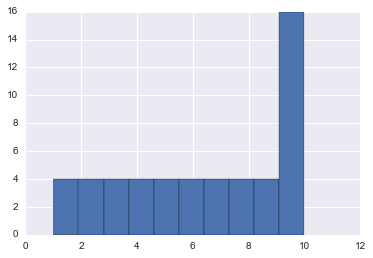

In [8]:

df["Values"].hist(bins=10)


1. First, create a histogram depicting the relative frequencies of the card values.
2. Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.

In [9]:
samples_sum = []

for i in range(30):
    item = df.sample(n=3,replace = False)["Values"].sum()
    samples_sum.append(item)

print samples_sum

[21L, 18L, 27L, 16L, 30L, 15L, 13L, 19L, 23L, 12L, 18L, 19L, 13L, 27L, 24L, 12L, 21L, 11L, 25L, 16L, 17L, 22L, 18L, 16L, 9L, 21L, 19L, 20L, 12L, 22L]


#### Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.

Median and mean can be the measures of central tendency while standard deviation and IQR reports can be the measures of variability. Given this is a small sample, it seems the variance is pretty high compared to standard error.

In [10]:
samples_sum = pd.Series(samples_sum)
print "median " + str(samples_sum.median())
samples_sum.describe()

median 18.5


count    30.000000
mean     18.533333
std       5.197701
min       9.000000
25%      15.250000
50%      18.500000
75%      21.750000
max      30.000000
dtype: float64

#### Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

According to central limit theorem , the sampling distribution always assumes a normal distribution while the first histogram reported actual frequencies of the deck of the card.

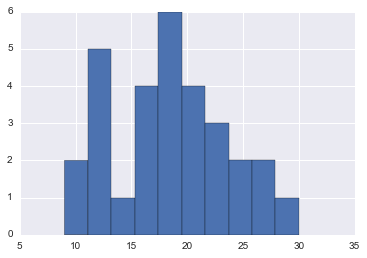

In [11]:
samples_sum.hist(bins=10)

##### Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

In [157]:
#For the top 5% or bottom 5% the corresponding Z score would be

z = -1.645

# Calculating SE from the original dataframe's std with a sample size of 3.


SE = df["Values"].std()/(3**(0.5))

print SE

mean = df["Values"].mean()
    
print mean + z*SE
print mean - z*SE



1.83809200045
3.51480019772
9.5621228792


18-23 should contain approximately 90% of the draw values.

In [141]:
df["Values"].describe()

count    52.000000
mean      6.538462
std       3.183669
min       1.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      10.000000
Name: Values, dtype: float64

In [142]:
(20-samples_sum.describe()["mean"])/SE

-0.58031190299864144

In [145]:
# From Z chart we get 

p = 1- 0.280852 # for Z = -0.35906

# 0.280852 is the probability that the drawn sample will be less than or equal to 20, so we do 1 - 0.280852 to get the probability 
# that the drawn sample will be larger than p.

In [146]:
p

0.719148

20 is near the mean so I'd assume that at least around 50% score would be above the mean. This score is pretty close.